In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("sales.csv")
sale = df["sales"]
sale

0       87695
1       86890
2       96442
3       98133
4      113615
        ...  
187    244642
188    237579
189    237579
190    217775
191    227621
Name: sales, Length: 192, dtype: int64

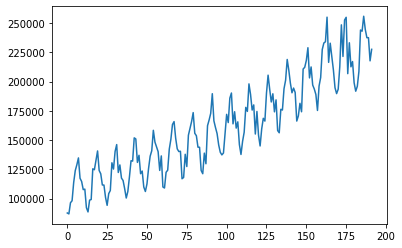

In [4]:
sale.plot()

(100000.0, 175000.0)

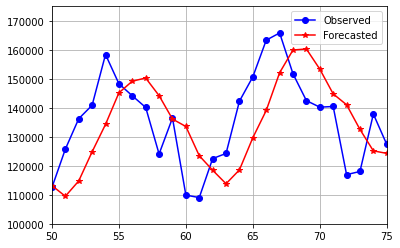

In [10]:
ypred = sale.rolling(3).mean().shift(1)

plt.plot(sale, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()
plt.xlim([50,75])
plt.ylim([1e5,1.75e5])


In [13]:
def mean_absolute_percentage_error(y,ypred):
    return np.mean(np.abs(y-ypred)/np.abs(y))*100

mape = mean_absolute_percentage_error(sale,ypred)
mape

9.369861815486232

8.432452246728381

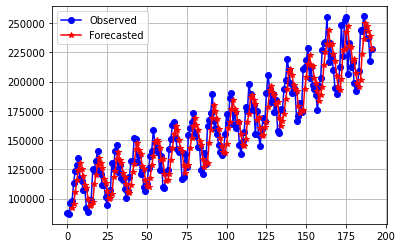

In [17]:
w = np.array([0.5,0.3,0.2])
k = w.size

ypred = sale.rolling(k).apply(lambda x: np.sum(x * w[::-1])).shift(1)

plt.plot(sale, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale,ypred)

7.284154873527489

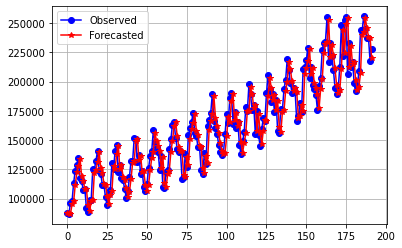

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mdl = ExponentialSmoothing(sale).fit()

ypred = mdl.fittedvalues
plt.plot(sale, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale,ypred)

In [22]:
sale_train = sale[:-12]
sale_val = sale[-12:]
sale_val

180    199024
181    191813
182    195997
183    208684
184    244113
185    243108
186    255918
187    244642
188    237579
189    237579
190    217775
191    227621
Name: sales, dtype: int64

8.97569630432994

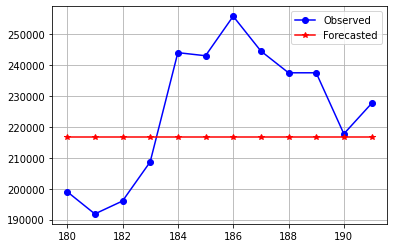

In [23]:
mdl = ExponentialSmoothing(sale_train).fit()

ypred = mdl.predict(sale_val.index[0],sale_val.index[-1])
plt.plot(sale_val, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale_val,ypred)

8.080376141616313

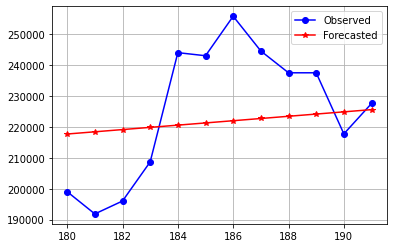

In [24]:
mdl = ExponentialSmoothing(sale_train, trend="add").fit()

ypred = mdl.predict(sale_val.index[0],sale_val.index[-1])
plt.plot(sale_val, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale_val,ypred)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


9.277964730981383

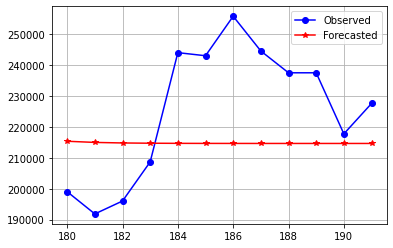

In [25]:
mdl = ExponentialSmoothing(sale_train, trend="add", damped=True).fit()

ypred = mdl.predict(sale_val.index[0],sale_val.index[-1])
plt.plot(sale_val, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale_val,ypred)

3.5859356498967556

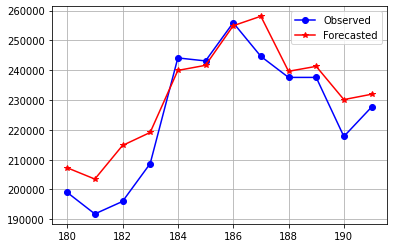

In [26]:
mdl = ExponentialSmoothing(sale_train, trend="add", seasonal="add", seasonal_periods=12).fit()

ypred = mdl.predict(sale_val.index[0],sale_val.index[-1])
plt.plot(sale_val, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale_val,ypred)

In [27]:
trend = [None,"add","mul"]
damped = [False,True]
seasonal = [None, "add","mul"]
best_mape = np.inf

for t in trend:
    for d in damped:
        for s in seasonal:
            if t == None:
                d = False
            mdl = ExponentialSmoothing(sale_train, trend=t, damped = d, seasonal=s, seasonal_periods=12).fit()
            ypred = mdl.predict(sale_val.index[0],sale_val.index[-1])
            mape = mean_absolute_percentage_error(sale_val,ypred)
            if mape < best_mape:
                best_mape = mape
                best_param = (t,d,s)

print(best_mape)
print(best_param)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2.6011321861191905
('add', True, 'mul')


2.6011321861191905

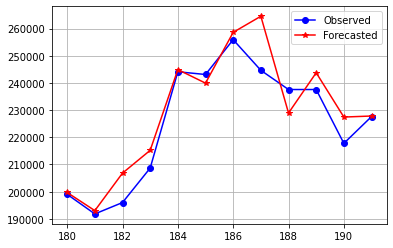

In [28]:
mdl = ExponentialSmoothing(sale_train, trend="add",damped = True, seasonal="mul", seasonal_periods=12).fit()

ypred = mdl.predict(sale_val.index[0],sale_val.index[-1])
plt.plot(sale_val, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale_val,ypred)

In [30]:
time_index = pd.date_range("2000-01-01", periods=sale.size, freq="MS")
time_index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=192, freq='MS')

In [31]:
df_sale = pd.DataFrame({"ds":time_index, "y": sale})
df_sale.head()

,ds,y
0,2000-01-01,87695
1,2000-02-01,86890
2,2000-03-01,96442
3,2000-04-01,98133
4,2000-05-01,113615


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.950018084030345

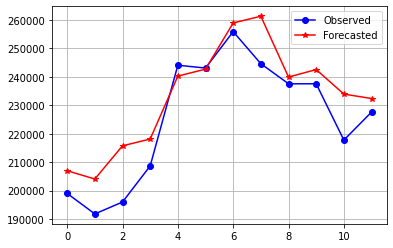

In [38]:
from fbprophet import Prophet

df_sale_train = df_sale.iloc[:-12,:]
df_sale_test = df_sale.iloc[-12:,:]

mdl = Prophet()
mdl.fit(df_sale_train)

df_ypred = mdl.predict(df_sale_test)
df_ypred

ypred = df_ypred.yhat.values
sale_val = df_sale_test.y.values

plt.plot(sale_val, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(sale_val,ypred)

In [40]:
def prepare_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    
    return np.array(X), np.array(y)

In [50]:
X, y = prepare_data(sale, lag = 12)
print(X.shape)
print(X[0:2])
print(y[0:2])

(180, 12)
[[ 87695  86890  96442  98133 113615 123924 128924 134775 117357 114626
  107677 108087]
 [ 86890  96442  98133 113615 123924 128924 134775 117357 114626 107677
  108087  92188]]
[92188 88591]


In [51]:
X_train = X[:-12,:]
X_test = X[-12:,:]
y_train = y[:-12]
y_test = y[-12:]

In [67]:
def prepare_data(data, lag = 2, offset = 2):
    X = []
    y = []
    for i in range(len(data)-lag-offset + 1):
        X.append(data[i:i+lag])
        y.append(data[i+lag+ offset -1])
    
    return np.array(X), np.array(y)

X, y = prepare_data(sale, lag = 12, offset = 12)
print(X.shape)
print(X[0:2])
print(y[0:2])

X_train = X[:-12,:]
X_test = X[-12:,:]
y_train = y[:-12]
y_test = y[-12:]

(169, 12)
[[ 87695  86890  96442  98133 113615 123924 128924 134775 117357 114626
  107677 108087]
 [ 86890  96442  98133 113615 123924 128924 134775 117357 114626 107677
  108087  92188]]
[111565 101007]


4.298039893532133

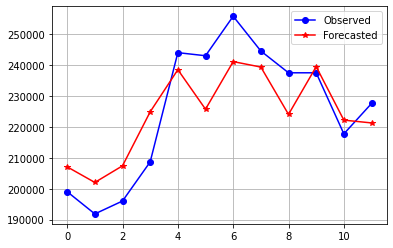

In [68]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

mdl = GradientBoostingRegressor()
mdl = RandomForestRegressor(max_depth=5)
mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)


plt.plot(y_test, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(y_test,ypred)



In [76]:
df_sale["month"] = df_sale.ds.dt.month
df_sale.month = df_sale.month.astype("str")
df_sale.drop("ds", axis = 1, inplace = True)
df_sale

,y,month
0,87695,1
1,86890,2
2,96442,3
3,98133,4
4,113615,5
...,...,...
187,244642,8
188,237579,9
189,237579,10
190,217775,11


In [77]:
df_sale = pd.get_dummies(df_sale)
df_sale

,y,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,87695,1,0,0,0,0,0,0,0,0,0,0,0
1,86890,0,0,0,0,1,0,0,0,0,0,0,0
2,96442,0,0,0,0,0,1,0,0,0,0,0,0
3,98133,0,0,0,0,0,0,1,0,0,0,0,0
4,113615,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,244642,0,0,0,0,0,0,0,0,0,0,1,0
188,237579,0,0,0,0,0,0,0,0,0,0,0,1
189,237579,0,1,0,0,0,0,0,0,0,0,0,0
190,217775,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
def prepare_data(data, lag = 2, offset = 2):
    X = []
    y = []
    for i in range(len(data)-lag-offset + 1):
        X.append(data[i:i+lag,:])
        y.append(data[i+lag+ offset -1,0])
    
    return np.array(X), np.array(y)

X, y = prepare_data(df_sale.values, lag = 12, offset = 12)
X = X.reshape(X.shape[0],-1)
print(X.shape)
print(X[0:5])
print(y[0:2])

X_train = X[:-12,:]
X_test = X[-12:,:]
y_train = y[:-12]
y_test = y[-12:]

3.90805333334535

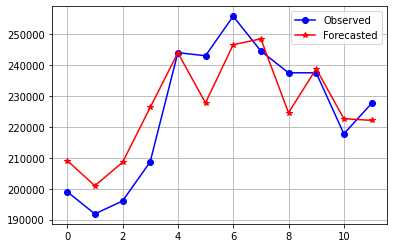

In [85]:
mdl = GradientBoostingRegressor()
mdl = RandomForestRegressor(max_depth=5)
mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)


plt.plot(y_test, "-ob", label = "Observed")
plt.plot(ypred,"-*r", label = "Forecasted")
plt.grid()
plt.legend()

mean_absolute_percentage_error(y_test,ypred)